## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
  input_layer = keras.layers.Input([x_train.shape[-1]])
  x = keras.layers.Dense(units=512, activation='relu')(input_layer)
  x = keras.layers.Dense(units=256, activation='relu')(x)
  x = keras.layers.Dense(units=128, activation='relu')(x)
  out = keras.layers.Dense(units=10, activation='softmax')(x)
  model = keras.models.Model(inputs = [input_layer], outputs = [out])
  return model
model = build_mlp()

In [5]:
optimizer = keras.optimizers.Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 7ms/step - loss: 2.1162 - accuracy: 0.2364 - val_loss: 1.7736 - val_accuracy: 0.3566
Epoch 2/500
196/196 [==============================] - 1s 5ms/step - loss: 1.7453 - accuracy: 0.3744 - val_loss: 1.6797 - val_accuracy: 0.4022
Epoch 3/500
196/196 [==============================] - 1s 5ms/step - loss: 1.6368 - accuracy: 0.4153 - val_loss: 1.6097 - val_accuracy: 0.4218
Epoch 4/500
196/196 [==============================] - 1s 5ms/step - loss: 1.5664 - accuracy: 0.4441 - val_loss: 1.5306 - val_accuracy: 0.4515
Epoch 5/500
196/196 [==============================] - 1s 5ms/step - loss: 1.5153 - accuracy: 0.4568 - val_loss: 1.5354 - val_accuracy: 0.4532
Epoch 6/500
196/196 [==============================] - 1s 5ms/step - loss: 1.4838 - accuracy: 0.4691 - val_loss: 1.5212 - val_accuracy: 0.4593
Epoch 7/500
196/196 [==============================] - 1s 5ms/step - loss: 1.4368 - accuracy: 0.4869 - val_loss: 1.4580 - val_accuracy: 0.4855

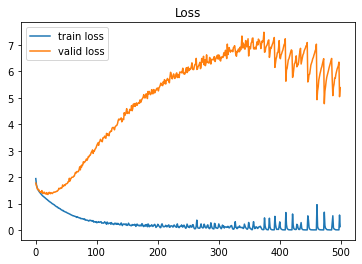

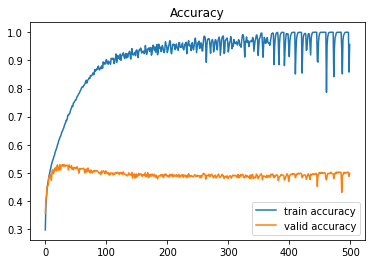

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Overfitting!

# Change the other optimizer(SGD)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
model = Sequential()
model.add(Dense(input_dim=x_train.shape[-1] , units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
sgd = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss=['categorical_crossentropy'], metrics=['accuracy'], optimizer=sgd)
model.fit(x_train, y_train, batch_size=256, epochs=500, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/500
196/196 [==============================] - 1s 6ms/step - loss: 2.2844 - accuracy: 0.1218 - val_loss: 2.1972 - val_accuracy: 0.2074
Epoch 2/500
196/196 [==============================] - 1s 5ms/step - loss: 2.1807 - accuracy: 0.2171 - val_loss: 2.1349 - val_accuracy: 0.2494
Epoch 3/500
196/196 [==============================] - 1s 5ms/step - loss: 2.1233 - accuracy: 0.2494 - val_loss: 2.0876 - val_accuracy: 0.2645
Epoch 4/500
196/196 [==============================] - 1s 5ms/step - loss: 2.0793 - accuracy: 0.2664 - val_loss: 2.0488 - val_accuracy: 0.2789
Epoch 5/500
196/196 [==============================] - 1s 5ms/step - loss: 2.0421 - accuracy: 0.2816 - val_loss: 2.0159 - val_accuracy: 0.2940
Epoch 6/500
196/196 [==============================] - 1s 5ms/step - loss: 2.0102 - accuracy: 0.2909 - val_loss: 1.9877 - val_accuracy: 0.3038
Epoch 7/500
196/196 [==============================] - 1s 5ms/step - loss: 1.9812 - accuracy: 0.3029 - val_loss: 1.9640 - val_accuracy: 0.3097

# 使用sgd更差 加入dropout可能會較好

In [30]:
model = Sequential()
model.add(Dense(input_dim=x_train.shape[-1] , units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [31]:
optimizer = keras.optimizers.Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [32]:
model.fit(x_train, y_train, batch_size=256, epochs=500, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 6ms/step - loss: 2.2974 - accuracy: 0.1500 - val_loss: 1.9943 - val_accuracy: 0.2819
Epoch 2/500
196/196 [==============================] - 1s 5ms/step - loss: 2.0446 - accuracy: 0.2253 - val_loss: 1.9494 - val_accuracy: 0.2990
Epoch 3/500
196/196 [==============================] - 1s 5ms/step - loss: 2.0169 - accuracy: 0.2321 - val_loss: 1.9375 - val_accuracy: 0.3144
Epoch 4/500
196/196 [==============================] - 1s 5ms/step - loss: 1.9939 - accuracy: 0.2446 - val_loss: 1.9692 - val_accuracy: 0.2712
Epoch 5/500
196/196 [==============================] - 1s 5ms/step - loss: 1.9763 - accuracy: 0.2573 - val_loss: 1.9508 - val_accuracy: 0.2925
Epoch 6/500
196/196 [==============================] - 1s 5ms/step - loss: 1.9667 - accuracy: 0.2576 - val_loss: 1.9247 - val_accuracy: 0.3134
Epoch 7/500
196/196 [==============================] - 1s 5ms/step - loss: 1.9520 - accuracy: 0.2680 - val_loss: 1.9080 - val_accuracy: 0.3143